# Face Detection Using OpenCV

OpenCV already contains many pre-trained classifiers for face, eyes, smile etc. Those pre-trained XML files are stored in opencv/data/. For face detection specifically, there are two pre-trained classifiers

1. Haar Cascade Classifier
2. LBP Cascade Classifier

**`Haar Cascade Classifier`** is more accurate but slower while **`LBP Cascade Classifier`** is less accurate but fast. I will show you to use both.

Let's import required libraries first

In [1]:
#import required libraries 
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time 
%matplotlib inline

## Haar Cascade Face Detection

A more accurate but slow OpenCV face detector. XML files for Haar Cascade are stored in `opencv/data/haarcascades/` folder. I have also copied one in `data` folder of this repo.

First we need to load the required XML classifier. Then load our input image in grayscale mode. Many operations in OpenCV are done in grayscale.

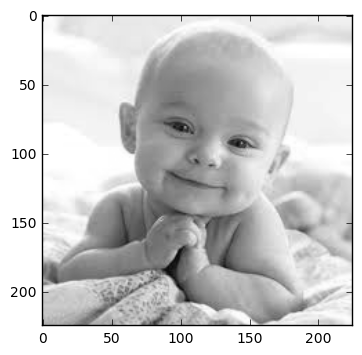

In [2]:
#load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml')

#load test iamge
test1 = cv2.imread('data/test1.jpg')

#convert the test image to gray image as opencv face detector expects gray images
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

#display the gray image 
# cv2.imshow('Test Imag', test_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(gray_img, cmap='gray')

* **`cv2.waitKey()`** is a keyboard binding function. Its argument is the time in milliseconds. The function waits for specified milliseconds for any keyboard event. If you press any key in that time, the program continues. If 0 is passed, it waits indefinitely for a key stroke. It can also be set to detect specific key strokes like, if key a is pressed etc.
* **`cv2.destroyAllWindows()`** simply destroys all the windows we created. 

Now we find the faces in the image with `detectMultiScale`. If faces are found, this function returns the positions of detected faces as Rect(x,y,w,h).

In [3]:
#let's detect multiscale (some images may be closer to camera than others) images
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5);

#print the number of faces found
print('Faces found: ', len(faces))

Faces found:  1


This function detects the faces in given test image and following are details of its options.

* The `detectMultiScale` function is a general function that detects objects. Since we are calling it on the face cascade, that’s what it detects. The first option is the grayscale image.

* The second is the `scaleFactor`. Since some faces may be closer to the camera, they would appear bigger than those faces in the back. The scale factor compensates for this.

* The detection algorithm uses a moving window to detect objects. `minNeighbors` defines how many objects are detected near the current one before it declares the face found.  

Next, let's loop over the list of faces (rectangles) it returned and draw those rectangles using built in OpenCV `rectangle` function on our original colored image to see if it detected the right faces. 

In [4]:
#go over list of faces and draw them as rectangles on original colored img
for (x, y, w, h) in faces:
    cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)

Display the original image to see rectangles drawn and verify that detected faces are really faces and not false positives. 

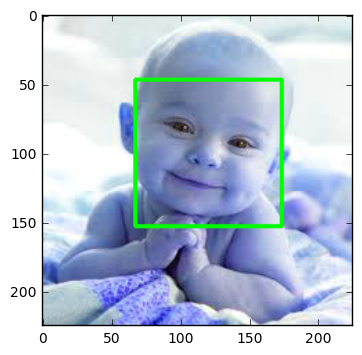

In [5]:
plt.imshow(test1)
#cv2.imshow('Faces drawn', test_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Grouping Code into a Function

It would be easy and reusable if we grouped this code into a function so let's make a function out of this code.

In [6]:
def detect_faces(f_cascade, colored_img):
    img_copy = np.copy(colored_img)
    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5);
    
    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    return img_copy

Now let's try this function on another image. 

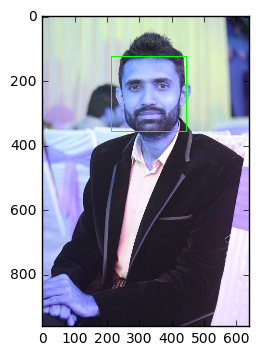

In [7]:
#load another image
test2 = cv2.imread('data/test2.jpg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2)

#show image
plt.imshow(faces_detected_img)
#cv2.imshow('Faces drawn', test_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## LBP Cascade Face Detection

A less accurate but fast OpenCV face detector. XML files for LBP Cascade are stored in `opencv/data/lbpcascades/` folder. I have also copied one in `data` folder of this repo.

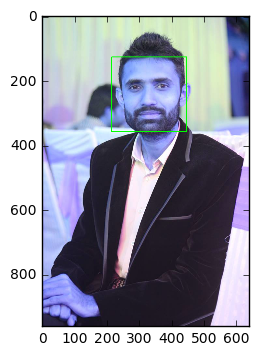

In [8]:
#load cascade classifier training file for lbpcascade
lbp_face_cascade = cv2.CascadeClassifier('data/lbpcascade_frontalface.xml')

#load test image
test2 = cv2.imread('data/test2.jpg')
#call our function to detect faces
faces_detected_img = detect_faces(lbp_face_cascade, test2)

#show image
plt.imshow(faces_detected_img)
#cv2.imshow('Faces drawn', test_img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

## Comparison between Haar and LBP Cascade Classifier

We will run both `Haar` and `LBP` on two test images to see accuracy and time delay of each.

In [9]:
#load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml')
#load cascade classifier training file for lbpcascade
lbp_face_cascade = cv2.CascadeClassifier('data/lbpcascade_frontalface.xml')

#load test image1
test1 = cv2.imread('data/test1.jpg')
#load test image2
test2 = cv2.imread('data/test2.jpg')

### Test1

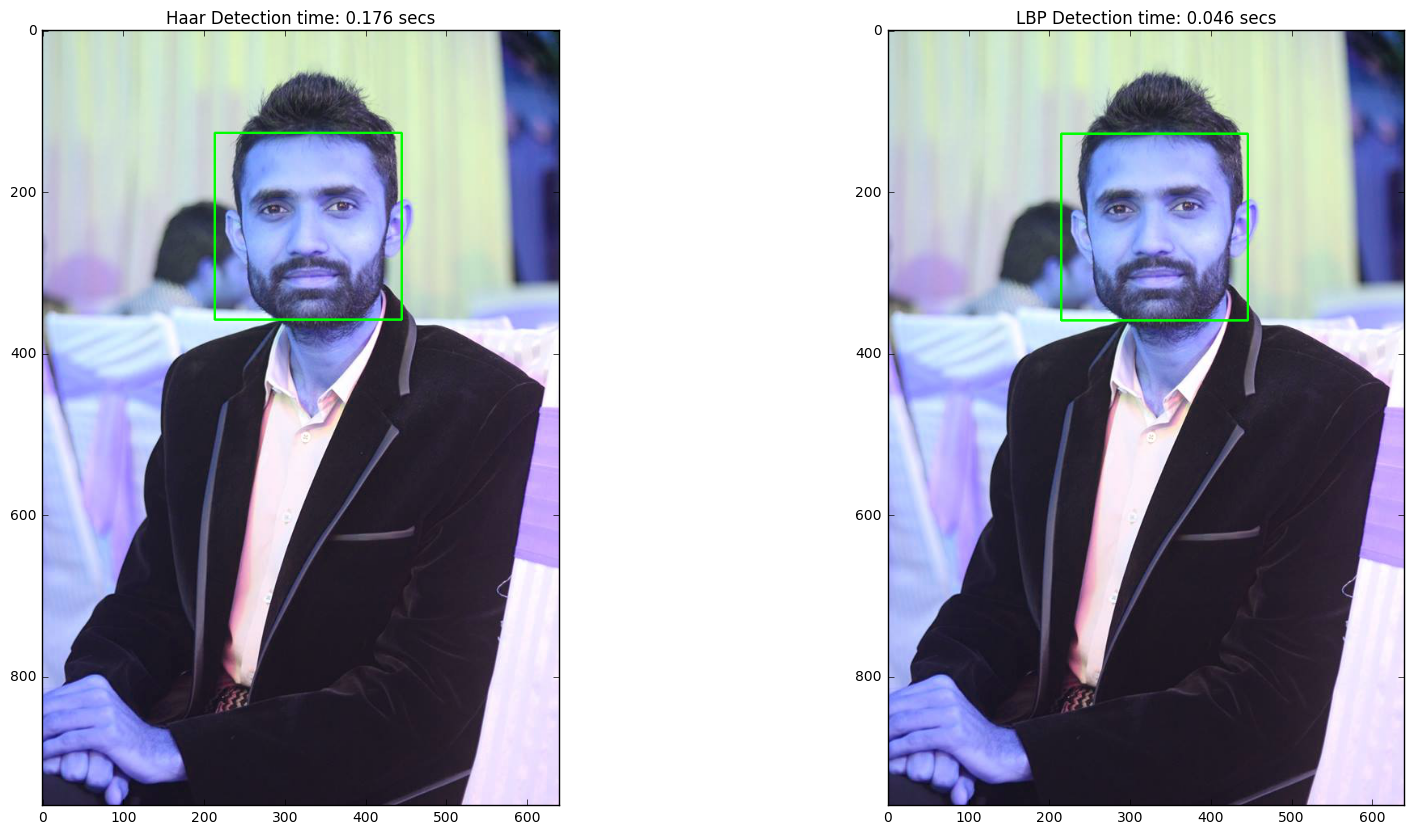

In [10]:
#------------HAAR-----------
#note time before detection
t1 = time.time()

#call our function to detect faces
haar_detected_img = detect_faces(haar_face_cascade, test2)

#note time after detection
t2 = time.time()
#calculate time difference
dt1 = t2 - t1
#print the time differene

#------------LBP-----------
#note time before detection
t1 = time.time()

lbp_detected_img = detect_faces(lbp_face_cascade, test2)

#note time after detection
t2 = time.time()
#calculate time difference
dt2 = t2 - t1
#print the time differene

#----------Let's do some fancy drawing-------------
#create a figure of 2 plots (one for Haar and one for LBP)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

#show Haar image
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(haar_detected_img)

#show LBP image
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(lbp_detected_img)

#show images
# plt.imshow(faces_detected_img)

- **Accuracy:** Both `Haar` and `LBP` were able to detect face successfully.
- **Speed:** `Haar` took _0.17 secs_ while `LBP` was fast and took _0.05 secs_.

### Test2 

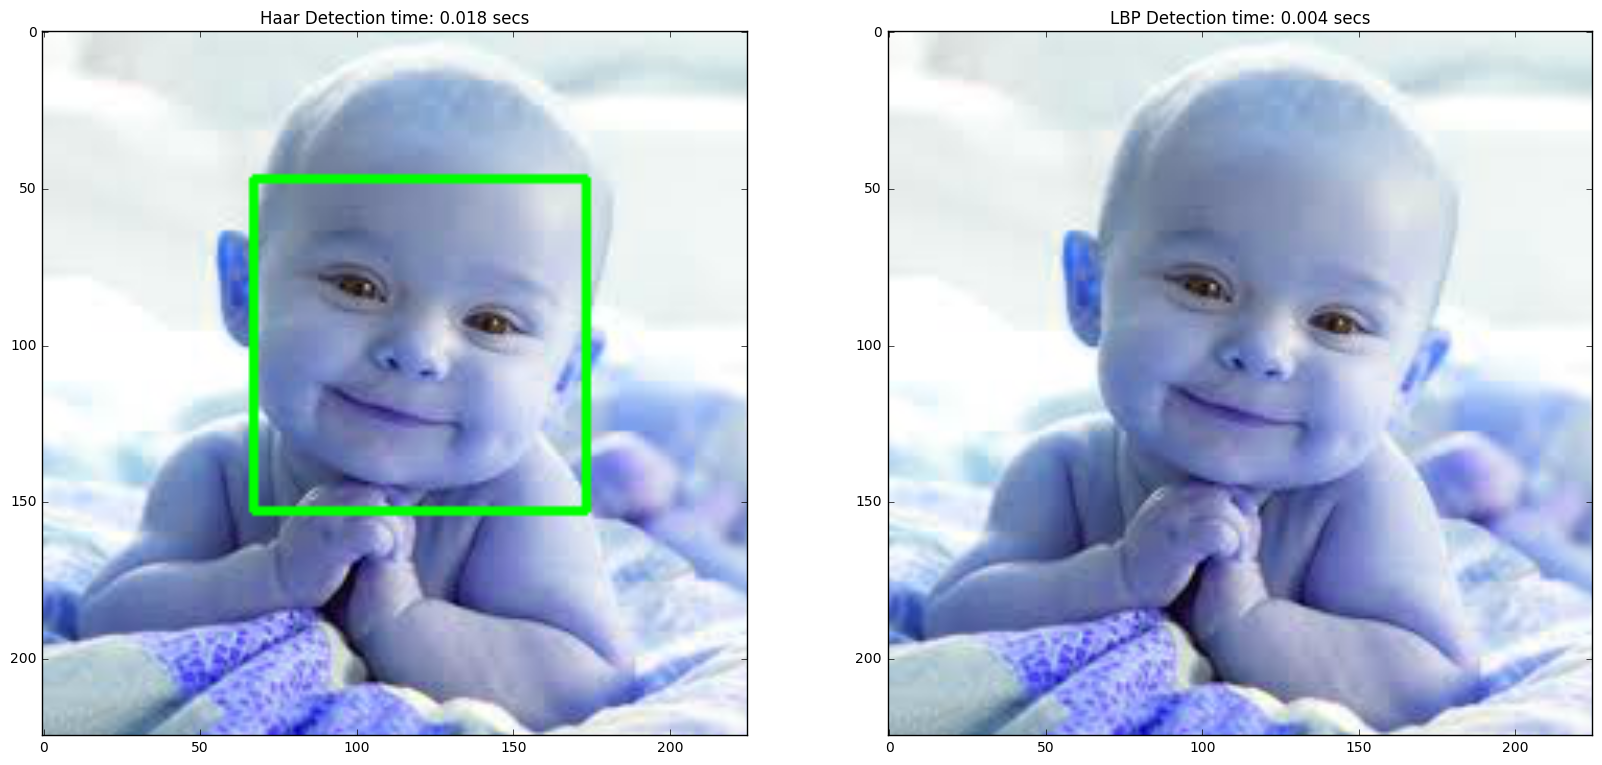

In [11]:
#------------HAAR-----------
#note time before detection
t1 = time.time()

#call our function to detect faces
haar_detected_img = detect_faces(haar_face_cascade, test1)

#note time after detection
t2 = time.time()
#calculate time difference
dt1 = t2 - t1
#print the time differene

#------------LBP-----------
#note time before detection
t1 = time.time()

lbp_detected_img = detect_faces(lbp_face_cascade, test1)

#note time after detection
t2 = time.time()
#calculate time difference
dt2 = t2 - t1
#print the time differene

#----------Let's do some fancy drawing-------------
#create a figure of 2 plots (one for Haar and one for LBP)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

#show Haar image
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(haar_detected_img)

#show LBP image
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(lbp_detected_img)

#show images
# plt.imshow(faces_detected_img)

- **Accuracy:** Only `Haar` were able to detect face successfully.
- **Speed:** `Haar` took _0.018 secs_ while `LBP` was fast and took _0.004 secs_.